In [5]:
#Project on Heart Disease Prediction

#Healthcare is a major domain where data mining techniques are widely used. If
#you are curious about data mining projects in healthcare, you should explore the
#heart disease dataset.

#Dataset: The dataset contains 75 particulars of 303 people. These particulars
#include parameters related to an individual’s heart health like age, gender, serum
#cholesterol, blood sugar, etc.

#The project implementation steps will go as follows:
#• Understand the dataset attributes
#• Apply the required data cleaning methods
#• Implement different classification models to investigate the performance of
#each classifier on heart disease datasets.
#• Mention your observations and study the parameters that play a vital role
#in determining the health condition of people’s hearts (ex. Gender-based
#analysis, age-based analysis, ... etc.)
#(What percentage of younger people are prone to be diagnosed with heart
#disease?
#Are women more prone to heart diseases, or is it the other way? .... etc.)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [8]:
Data = pd.read_csv('heart.csv')

In [9]:
#understand the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#encoding preprocessing to covert all types to int
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Data['oldpeak'] = ordinal_encoder.fit_transform(Data[['oldpeak']]).astype(int)

In [11]:
#understand the data
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,22,0,0,1,1
1,37,1,2,130,250,0,1,187,0,32,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1


In [12]:
# Check for missing values
Data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
Data.duplicated().sum()

1

In [14]:
# View the duplicate row
duplicate_row = Data[Data.duplicated()]
print(duplicate_row)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0        0   

     slope  ca  thal  target  
164      2   4     2       1  


In [15]:
#Data = Data.drop_duplicates()

In [16]:
# Check again for duplicates to confirm removal
#print(Data.duplicated().sum())

In [17]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:

class_distribution = Data['target'].value_counts()
print(class_distribution)


target
1    165
0    138
Name: count, dtype: int64


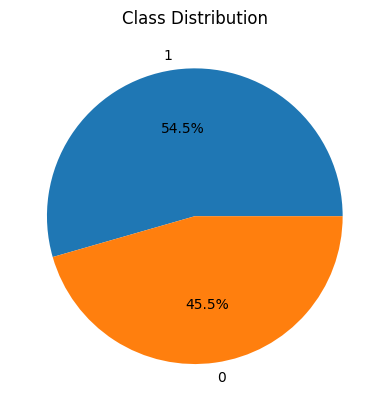

In [33]:
class_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

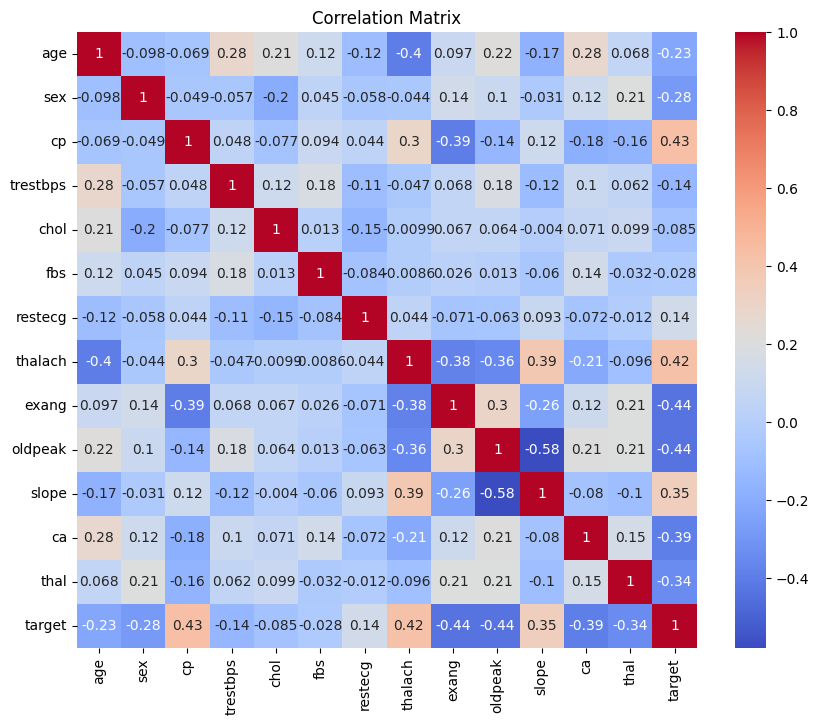

In [19]:

# Calculate the correlation matrix
corr_matrix = Data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


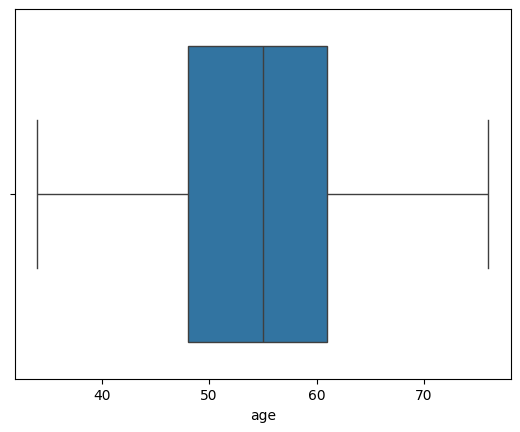

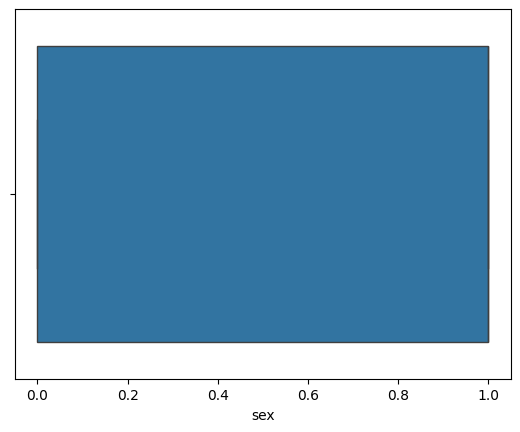

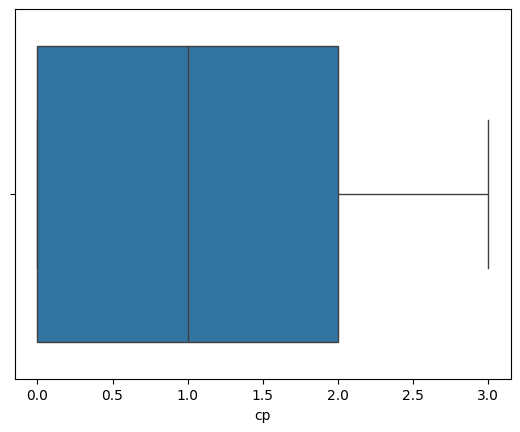

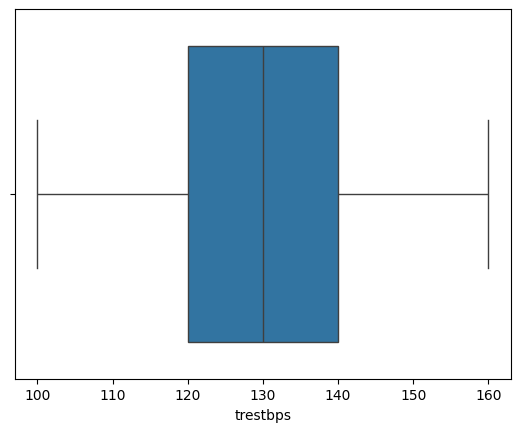

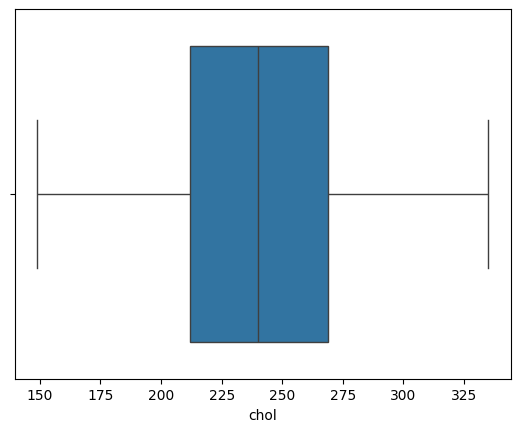

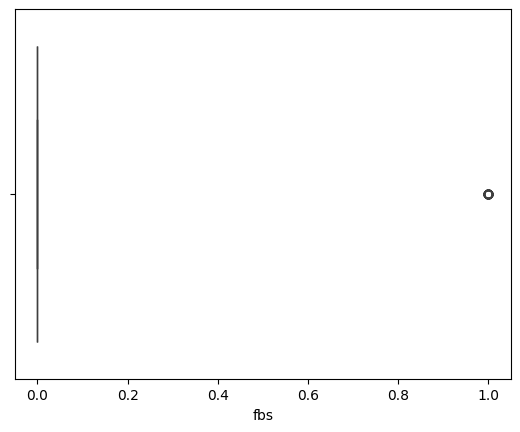

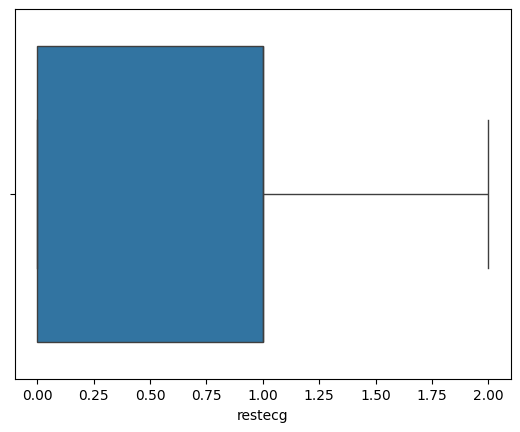

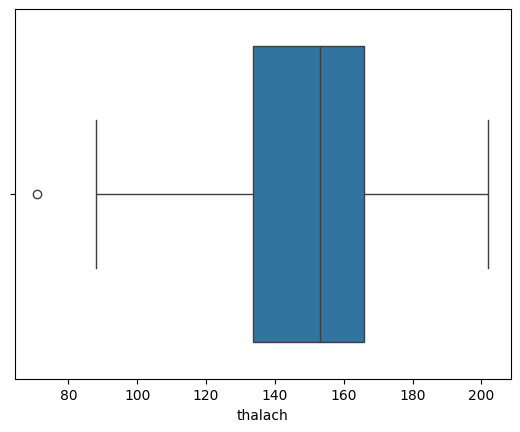

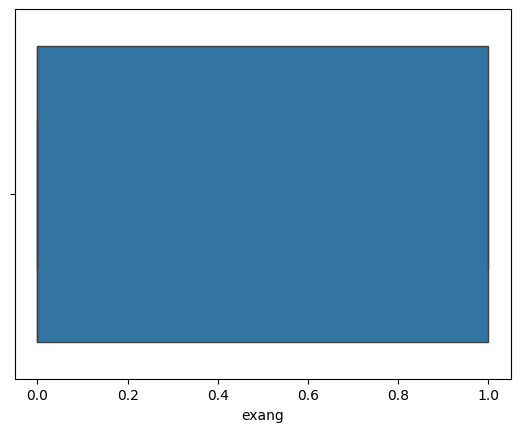

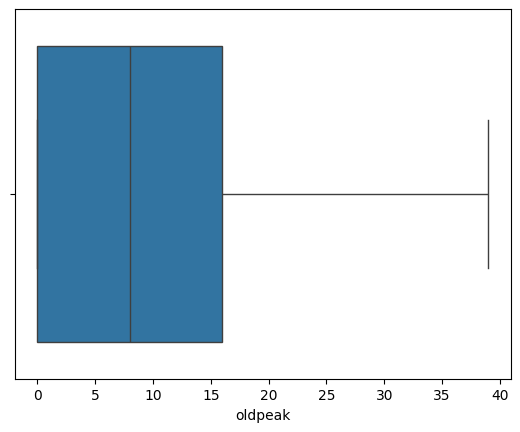

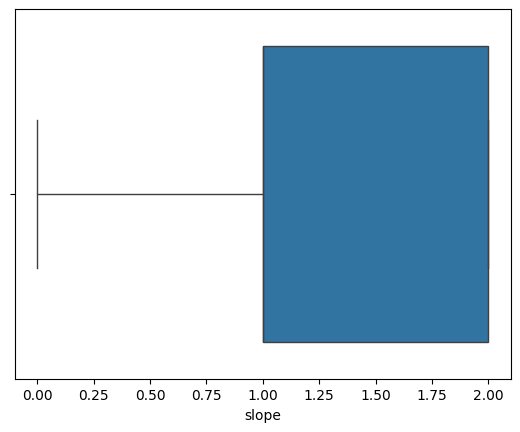

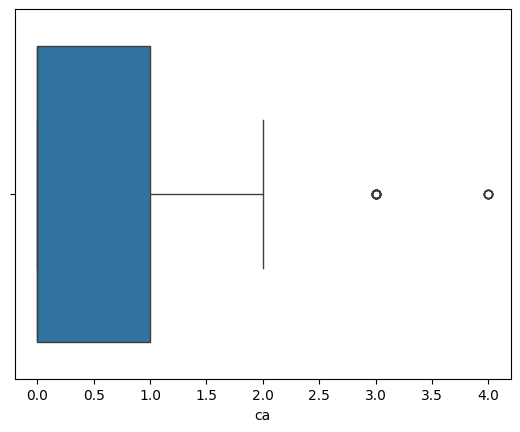

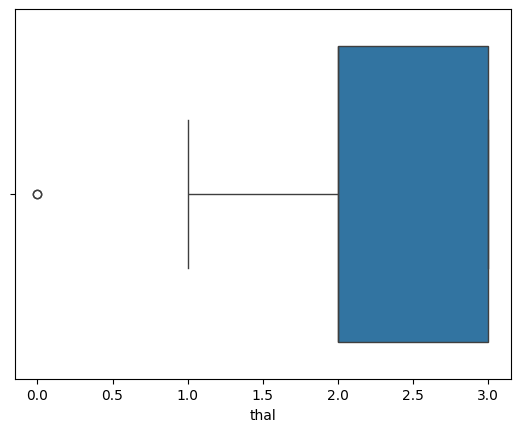

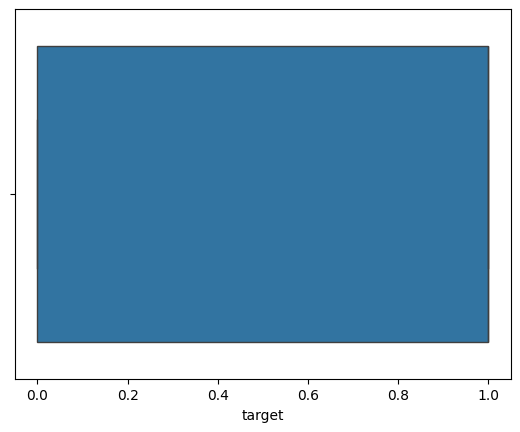

In [39]:
# Calculate the IQR
for column in Data.columns:
    sns.boxplot(x=Data[column])
    plt.show()

In [21]:

# Calculate the median absolute deviation (MAD) for each column
mad_age = np.median(np.abs(Data['age'] - np.median(Data['age'])))
mad_trestbps = np.median(np.abs(Data['trestbps'] - np.median(Data['trestbps'])))
mad_chol = np.median(np.abs(Data['chol'] - np.median(Data['chol'])))
threshold = 3

# Replace outliers with the median value
Data['age'] = np.where(np.abs(Data['age'] - np.median(Data['age'])) > threshold * mad_age,
                      np.median(Data['age']), Data['age'])
Data['trestbps'] = np.where(np.abs(Data['trestbps'] - np.median(Data['trestbps'])) > threshold * mad_trestbps,
                          np.median(Data['trestbps']), Data['trestbps'])
Data['chol'] = np.where(np.abs(Data['chol'] - np.median(Data['chol'])) > threshold * mad_chol,
                        np.median(Data['chol']), Data['chol'])




**the plot shows that the females have heart disease**

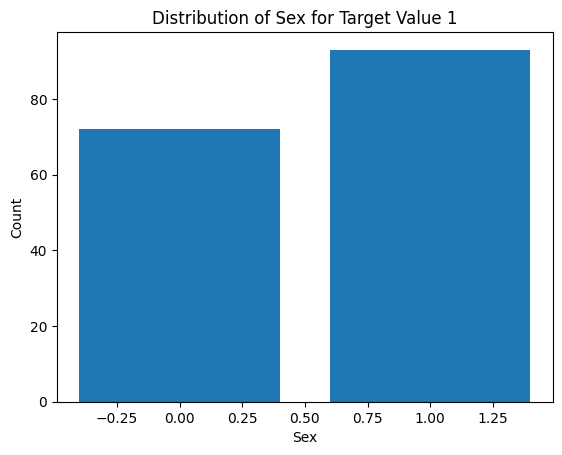

In [22]:

Data_target_1 = Data[Data['target'] == 1]['sex'].value_counts()
plt.bar(Data_target_1.index, Data_target_1.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex for Target Value 1')
plt.show()


**average heart beat per second for patint is 130**



In [23]:

average_trestbps_target_1 = Data[Data['target'] == 1]['trestbps'].median()

print("Average trestbps for people have it ", average_trestbps_target_1)


Average trestbps for people have it  130.0


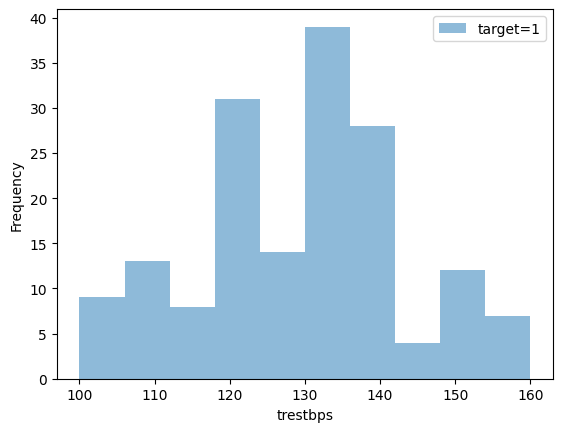

In [24]:

plt.hist(Data[Data.target==1].trestbps, alpha=0.5, label='target=1')
plt.legend()
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()


**average chol second is 242**

In [25]:

average_chol_target_1 = Data[Data['target'] == 1]['chol'].mean()

print("Average chol for people have it ", average_chol_target_1)


Average chol for people have it  236.9090909090909


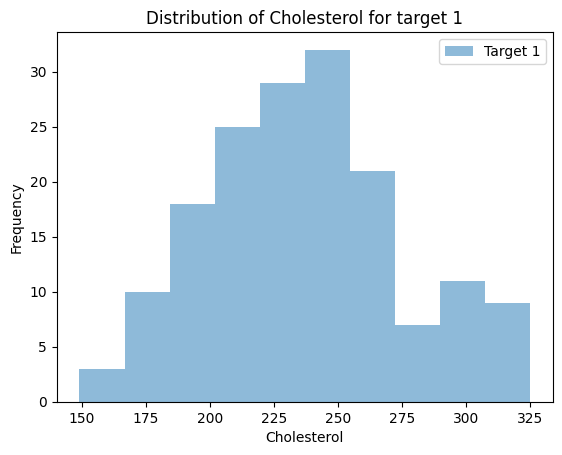

In [26]:


plt.hist(Data[Data['target'] == 1]['chol'], alpha=0.5, label='Target 1')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol for target 1')
plt.legend()
plt.show()


**the plot shows that elder people have it more than younger**

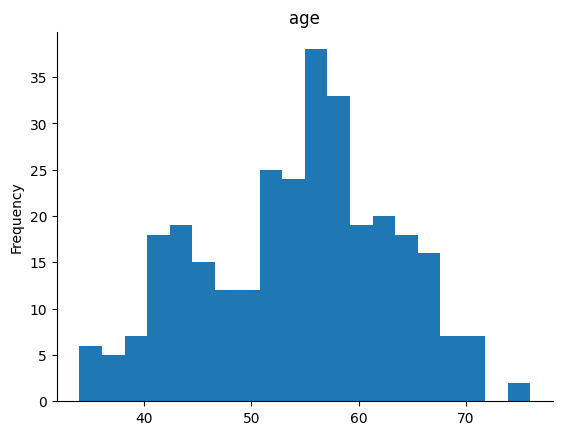

In [27]:

Data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the name of the column you're trying to predict
X = Data.drop('target', axis=1)  # removes target column for testing it later
y = Data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train.value_counts()

,count
target,
1,115
0,97


In [29]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred_lr = lr_model.predict(X_test)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
# print(classification_report(y_test, y_pred_lr))
# print(confusion_matrix(y_test, y_pred_lr))


# Predict the test set results
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# Calculate precision
lr_precision = precision_score(y_test, y_pred_lr)
print("Logistic Regression Precision:", lr_precision)

# Calculate recall
lr_recall = recall_score(y_test, y_pred_lr)
print("Logistic Regression Recall:", lr_recall)

# Calculate F1 score
lr_f1 = f1_score(y_test, y_pred_lr)
print("Logistic Regression F1 Score:", lr_f1)

# Classification report (includes precision, recall, F1-score)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8021978021978022
Logistic Regression Precision: 0.82
Logistic Regression Recall: 0.82
Logistic Regression F1 Score: 0.82

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Logistic Regression Confusion Matrix:
[[32  9]
 [ 9 41]]


In [30]:
#random forrest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred_rf = rf_model.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))


# Predict the test set results
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate precision
rf_precision = precision_score(y_test, y_pred_rf)
print("Random Forest Precision:", rf_precision)

# Calculate recall
rf_recall = recall_score(y_test, y_pred_rf)
print("Random Forest Recall:", rf_recall)

# Calculate F1 score
rf_f1 = f1_score(y_test, y_pred_rf)
print("Random Forest F1 Score:", rf_f1)

# Classification report (includes precision, recall, F1-score)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8131868131868132
Random Forest Precision: 0.8367346938775511
Random Forest Recall: 0.82
Random Forest F1 Score: 0.8282828282828283

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Random Forest Confusion Matrix:
[[33  8]
 [ 9 41]]


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate precision
dt_precision = precision_score(y_test, y_pred_dt)
print("Decision Tree Precision:", dt_precision)

# Calculate recall
dt_recall = recall_score(y_test, y_pred_dt)
print("Decision Tree Recall:", dt_recall)

# Calculate F1 score
dt_f1 = f1_score(y_test, y_pred_dt)
print("Decision Tree F1 Score:", dt_f1)

# Classification report (includes precision, recall, F1-score)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7582417582417582
Decision Tree Precision: 0.8181818181818182
Decision Tree Recall: 0.72
Decision Tree F1 Score: 0.7659574468085107

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.82      0.72      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

Decision Tree Confusion Matrix:
[[33  8]
 [14 36]]


In [32]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [lr_accuracy, rf_accuracy, accuracy_score(y_test, y_pred_dt)],
    'Precision': [lr_precision, rf_precision, precision_score(y_test, y_pred_dt)],
    'Recall': [lr_recall, rf_recall, recall_score(y_test, y_pred_dt)],
    'F1 Score': [lr_f1, rf_f1, f1_score(y_test, y_pred_dt)]
})

print(results)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.802198   0.820000    0.82  0.820000
1        Random Forest  0.813187   0.836735    0.82  0.828283
2        Decision Tree  0.758242   0.818182    0.72  0.765957
